# Data Analysis: Data Collection, Cleaning, and Exploratory Data Analysis

This notebook provides a thorough analysis of a dataset related to diabetes. The main goals are to gather the data, clean it, carry out exploratory data analysis (EDA), and get it ready for machine learning modeling. Along the way, patterns and insights related to patient demographics, the medications they used, treatment outcomes, and readmission rates will be derived.

## Data Collection

Here, we load the dataset into memory.

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the CSV file into diabetic_df DataFrame
diabetic_df = pd.read_csv('diabetic_data.csv', header = 0, encoding='utf-8')

### Initial Data Exploration

Checking the structure of the data, like the column names, data types, shape, and a preview of the rows.

In [3]:
# View the columns of the loaded-up DataFrame
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
# Display the first five rows of the DataFrame
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Display the last five rows of the DataFrame
diabetic_df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
# Display 10 random rows of the DataFrame
diabetic_df.sample(n=10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
23167,79247328,14999922,Caucasian,Female,[50-60),?,1,1,7,8,...,No,No,No,No,No,No,No,Ch,Yes,<30
96858,381340766,43785333,Caucasian,Male,[80-90),?,2,1,4,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
4361,24846168,619704,AfricanAmerican,Female,[40-50),?,2,1,1,3,...,No,No,No,No,No,No,No,No,No,>30
12487,50683080,53252937,AfricanAmerican,Female,[60-70),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
8325,37852254,685773,Caucasian,Male,[90-100),?,1,18,7,11,...,No,No,No,No,No,No,No,Ch,Yes,NO
64350,179130630,85813416,Caucasian,Male,[90-100),?,1,3,1,5,...,No,Down,No,No,No,No,No,Ch,Yes,NO
39968,124291482,41356647,Caucasian,Female,[60-70),?,3,3,1,3,...,No,Steady,No,No,No,No,No,No,Yes,<30
19621,69791484,70154838,Asian,Female,[40-50),?,1,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
93336,334266746,110676141,Caucasian,Male,[70-80),?,2,3,7,1,...,No,No,No,No,No,No,No,No,No,NO
62628,174453042,40815144,Caucasian,Female,[70-80),?,1,1,7,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [7]:
# Check the number of rows and columns of the DataFrame
diabetic_df.shape

(101766, 50)

In [8]:
# Check the general information about the dataset
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Descriptive Statistics

This section provides a quick statistical summary to help understand the mean, count, and spread of the data.

In [9]:
# Get a quick statistical summary of the DataFrame
diabetic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Data Cleaning

This is done to handle missing values, take care of errors, and prepare the data for analysis.

In [10]:
diabetic_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
# Sort the DataFrame based on the patient number
diabetic_df1 = diabetic_df.sort_values(by='patient_nbr')

# Drop duplicate rows of the 'patient_nbr' column for all patients, keeping just the first occurence
# The idea is for one patient not to appear in the dataset more than once
diabetic_df1 = diabetic_df.drop_duplicates(subset='patient_nbr', keep='first')

# Reset the index of the DataFrame
diabetic_df1 = diabetic_df1.reset_index(drop=True)

In [12]:
# Check for missing values in each column of the dataset
diabetic_df1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               68062
A1Cresult                   58532
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
# Replace all entries of 'None' with 'No Test' in both the 'max_glu_serum' and 'A1Cresult' columns
# This was done first because Pandas automatically takes 'None' as 'NaN'
diabetic_df1['max_glu_serum'].fillna('No Test', inplace=True)
diabetic_df1['A1Cresult'].fillna('No Test', inplace=True)

In [14]:
# View how the 'max_glu_serum' and 'A1Cresult' columns now look
diabetic_df1[['max_glu_serum', 'A1Cresult']]

,max_glu_serum,A1Cresult
0,No Test,No Test
1,No Test,No Test
2,No Test,No Test
3,No Test,No Test
4,No Test,No Test
...,...,...
71513,No Test,>7
71514,No Test,>8
71515,No Test,No Test
71516,No Test,No Test


In [15]:
# Replace all occurences of '?' in the dataset with 'NaN'
diabetic_df1.replace('?', np.nan, inplace=True)

In [16]:
# Check for missing values
diabetic_df1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         1948
gender                          0
age                             0
weight                      68665
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [17]:
# Identify the most frequent race in the 'race' column, i.e. the mode
most_frequent_race = diabetic_df1['race'].value_counts().idxmax()

# Fill the missing values in the 'race' column with the race that appears most frequently (the mode)
diabetic_df1['race'].fillna(most_frequent_race, inplace=True)

In [18]:
# Delete the 'weight' column as it contains too many missing values
diabetic_df1.drop(columns=['weight'], inplace=True)

# Delete the 'payer_code' column as it's not so relevant in the analysis and contains too many missing values
diabetic_df1.drop(columns=['payer_code'], inplace=True)

In [19]:
# Replace all missing values (NaN) in the 'medical_specialty' column with 'Missing'
diabetic_df1['medical_specialty'].fillna('Missing', inplace=True)

In [20]:
# Replace all missing values (NaN) in the 'diag_1', 'diag_2', and 'diag_3' columns with 'Unknown'
diabetic_df1['diag_1'].fillna('Unknown', inplace=True)
diabetic_df1['diag_2'].fillna('Unknown', inplace=True)
diabetic_df1['diag_3'].fillna('Unknown', inplace=True)

In [21]:
# Check for missing values again to see if all preceding missing-value-handling processes were successful
diabetic_df1.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [22]:
# Check the new shape of the DataFrame
diabetic_df1.shape

(71518, 48)

In [23]:
# Save the cleaned dataset to a CSV file for use in Tableau analysis
diabetic_df1.to_csv('cleaned_data_for_tableau.csv')
print('File Saved Successfully!')

File Saved Successfully!


## Exploratory Data Analysis (EDA)

The objective in this section is to explore the cleaned data to identify trends, patterns, correlations, and relationships between variables. This analysis helps in understanding the dataset better for more analysis and machine learning modeling.

### Univariate Analysis

#### Demographic Analysis

Analysis of the distribution of demographic variables, such as age, gender, and race.

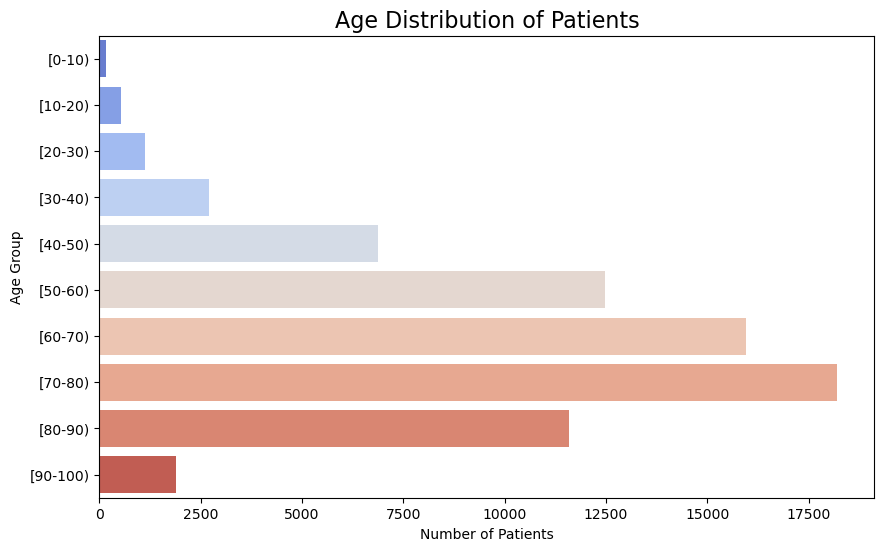

In [24]:
# Set a big size for the plot to make it easy to read
plt.figure(figsize=(10, 6))

# Plot a horizontal count plot to see the distribution of age groups
# Set the palette parameter
sns.countplot(y='age', data=diabetic_df1, palette='coolwarm')

# Add a title to the plot and choose an easy-to-read font size
plt.title('Age Distribution of Patients', fontsize=16)

# Label the x and y axes
plt.xlabel('Number of Patients')
plt.ylabel('Age Group')

# Display the plot
plt.show()

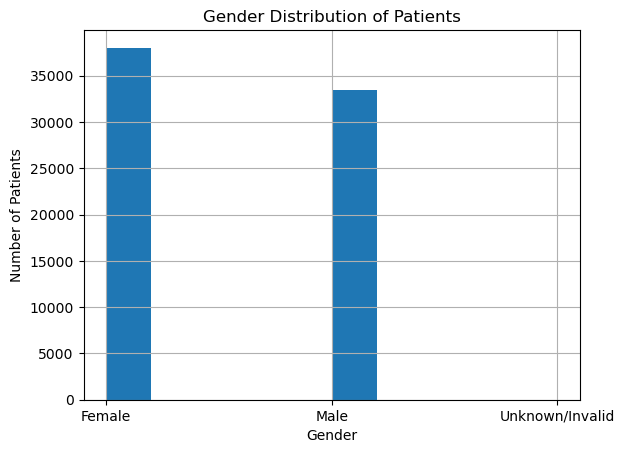

In [25]:
# Plot a histogram to show how gender is distributed in the dataset
diabetic_df1['gender'].hist()

plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Gender Distribution of Patients')

# Display the plot
plt.show()

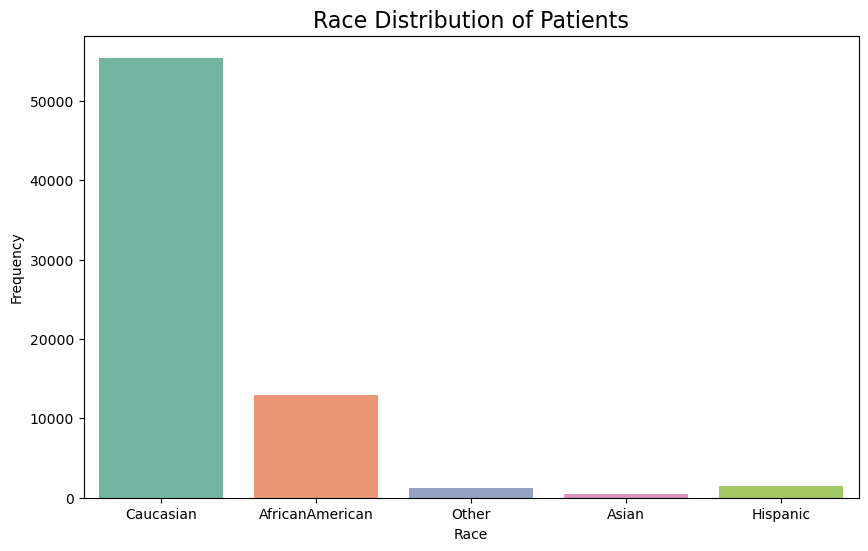

In [26]:
# Bar chart to show the race distribution among patients
# Set a good figure size
plt.figure(figsize=(10, 6))

# Set2 palette is selected to make the chart appear more appealing
sns.countplot(x='race', data=diabetic_df1, palette='Set2')

plt.title('Race Distribution of Patients', fontsize=16)
plt.xlabel('Race')
plt.ylabel('Frequency')

plt.show()

#### Analysis of Other Key Variables

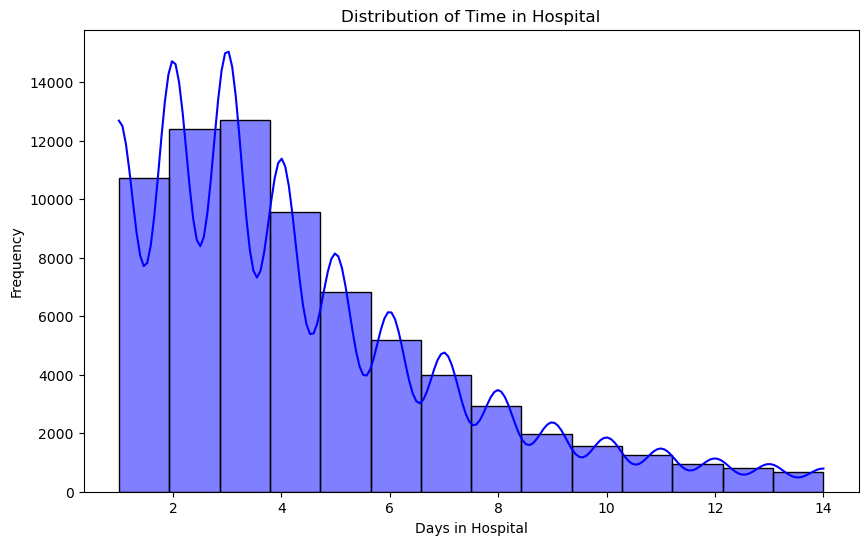

In [27]:
# Histogram to show the distribution of time spent in the hospital (in days)
plt.figure(figsize=(10, 6))

# 'bins=14' parameter divides the data into 14 intervals
# 'kde=True' parameter adds a smooth curve to the histogram
sns.histplot(diabetic_df1['time_in_hospital'], bins=14, kde=True, color='blue')

plt.title('Distribution of Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')

plt.show()

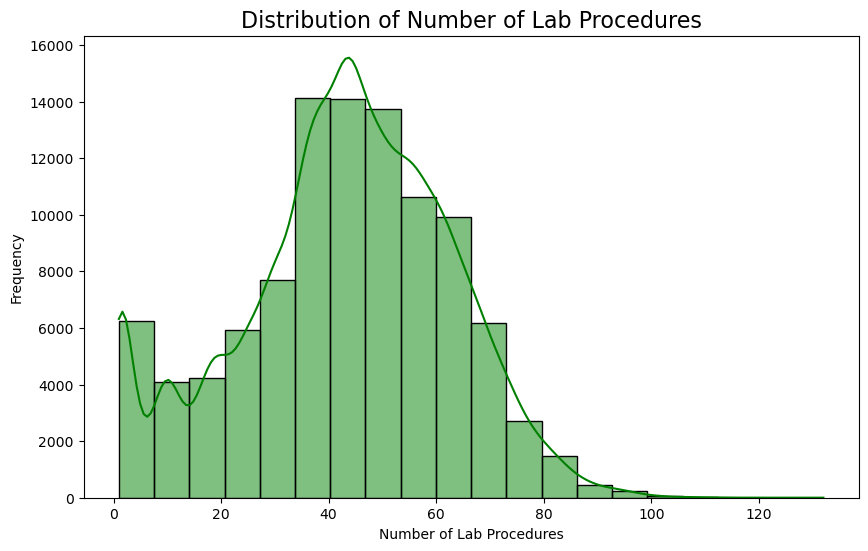

In [28]:
# Histogram to show the distribution of the number of lab procedures in dataset
plt.figure(figsize=(10, 6))

# 'bins=20' parameter divides the data into 20 intervals
sns.histplot(diabetic_df['num_lab_procedures'], bins=20, kde=True, color='green')

plt.title('Distribution of Number of Lab Procedures', fontsize=16)
plt.xlabel('Number of Lab Procedures')

plt.ylabel('Frequency')
plt.show()

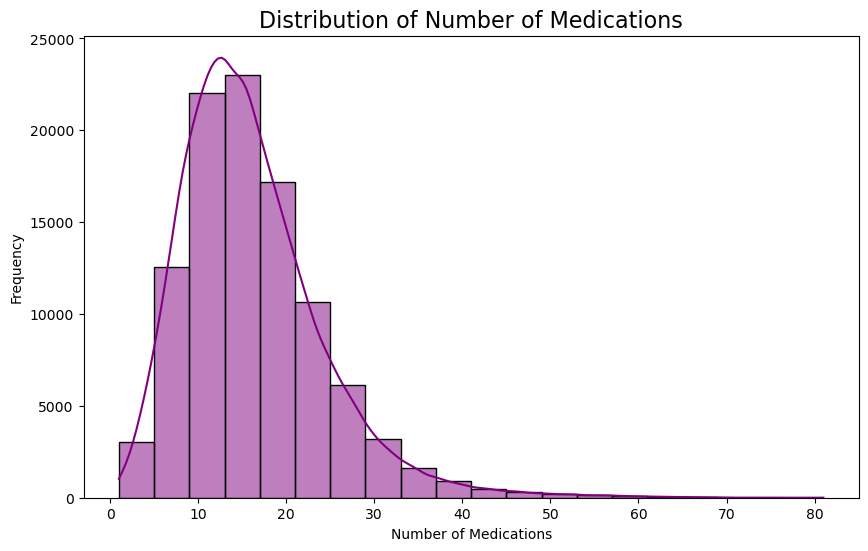

In [29]:
# Histogram to show the distribution of the number of medications in dataset
plt.figure(figsize=(10, 6))

sns.histplot(diabetic_df['num_medications'], bins=20, kde=True, color='purple')

plt.title('Distribution of Number of Medications', fontsize=16)
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')

plt.show()

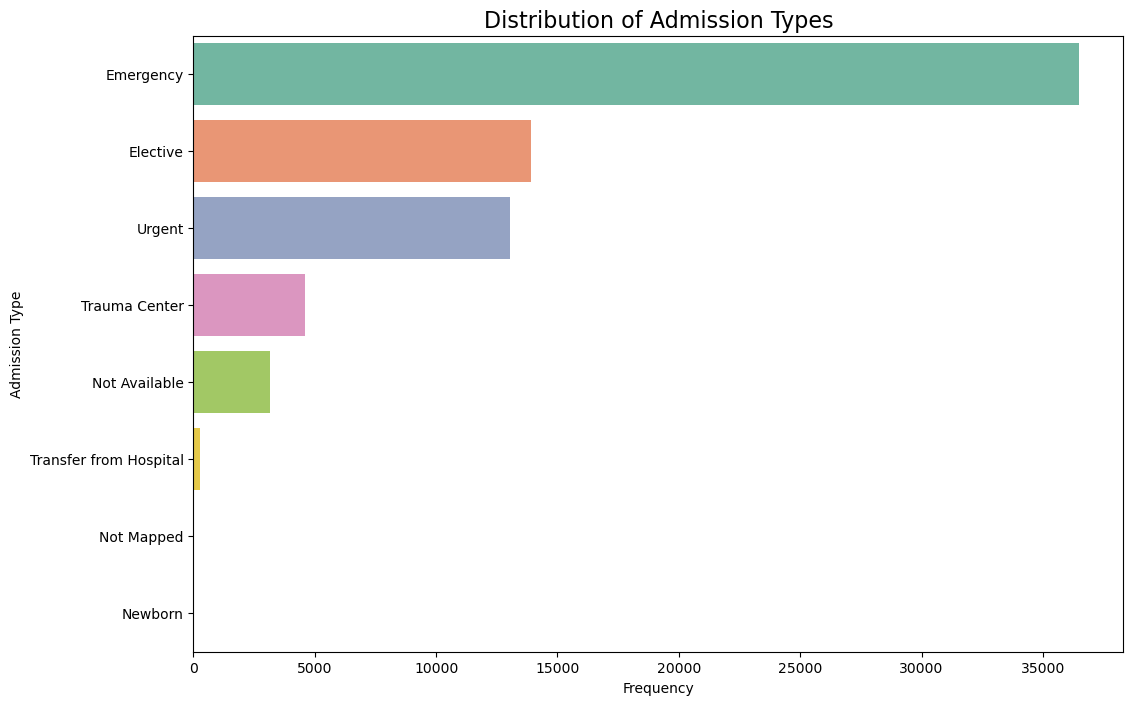

In [30]:
# Make a dictionary to map admission type IDs to their descriptions
# This will make the plot more meaningful and easier to understand
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'Trauma Center',
    7: 'Not Mapped',
    8: 'Transfer from Hospital'
}

# Replace the IDs with more meaningful labels
diabetic_df1['admission_type'] = diabetic_df1['admission_type_id'].map(admission_type_mapping)

plt.figure(figsize=(12, 8))

# Count plot to show the number of patients admitted into the hospital via different admission types
# The 'order' parameter sorts the admission types in the order of their frequency
sns.countplot(y='admission_type', data=diabetic_df1, palette='Set2', order=diabetic_df1['admission_type'].value_counts().index)
plt.title('Distribution of Admission Types', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Admission Type')

plt.show()

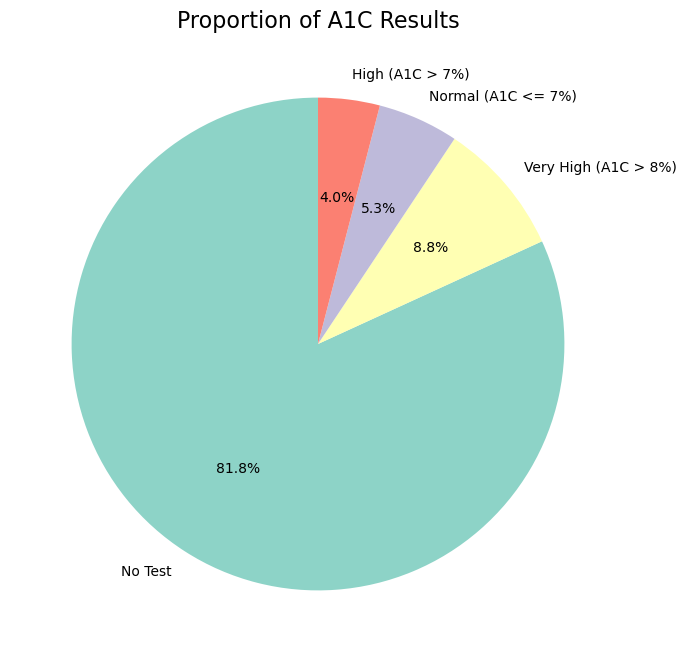

In [31]:
# Make a dictionary to map the A1Cresult values to their descriptions
A1Cresult_mapping = {
    '>7': 'High (A1C > 7%)',
    '>8': 'Very High (A1C > 8%)',
    'Norm': 'Normal (A1C <= 7%)',
    'No Test': 'No Test'
}

# Replace the 'A1Cresult' column values with more meaningful labels
diabetic_df1['A1Cresult'] = diabetic_df1['A1Cresult'].map(A1Cresult_mapping)

plt.figure(figsize=(8, 8))

# The 'autopct' parameter shows the percentage of each category on the pie chart
# The 'startangle' parameter is to rotate the chart so that the first slice starts at the top
diabetic_df1['A1Cresult'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)

plt.title('Proportion of A1C Results', fontsize=16)
plt.ylabel('')  # Hide the y-label to keep the chart clean

plt.show()

<Figure size 1200x800 with 0 Axes>

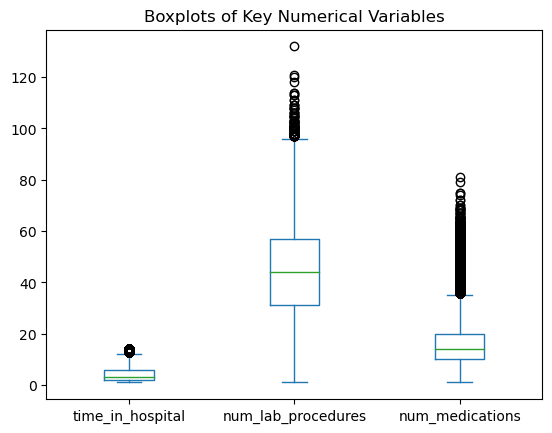

In [32]:
# Create a list to store some key numerical columns of the dataset
numeric_variables = ['time_in_hospital', 'num_lab_procedures', 'num_medications']

plt.figure(figsize=(12, 8))

# Create boxplots to see the distribution of the selected numerical variables and locate outliers
diabetic_df1[numeric_variables].plot(kind='box')

plt.title('Boxplots of Key Numerical Variables')

plt.show()

### Bivariate Analysis

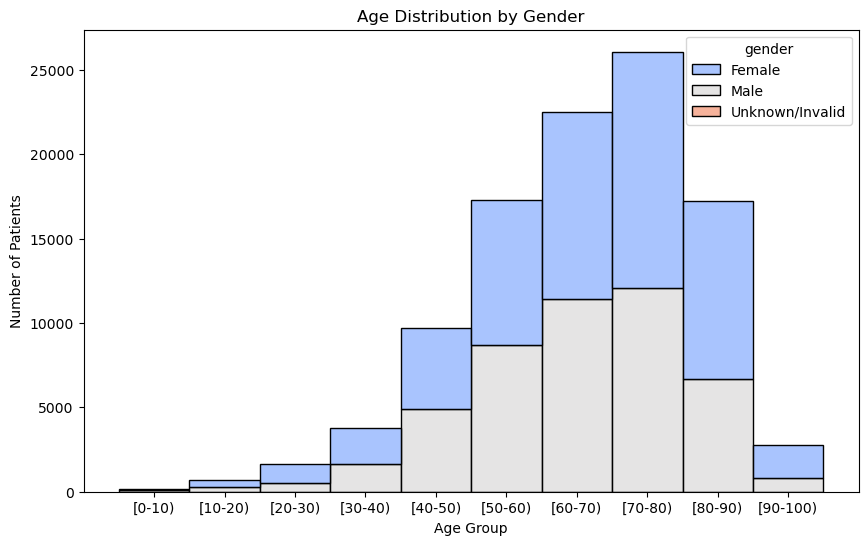

In [33]:
plt.figure(figsize=(10, 6))

# Stacked bar chart to show the distribution of age by gender
sns.histplot(data=diabetic_df, x='age', hue='gender', multiple='stack', palette='coolwarm')

plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')

plt.show()

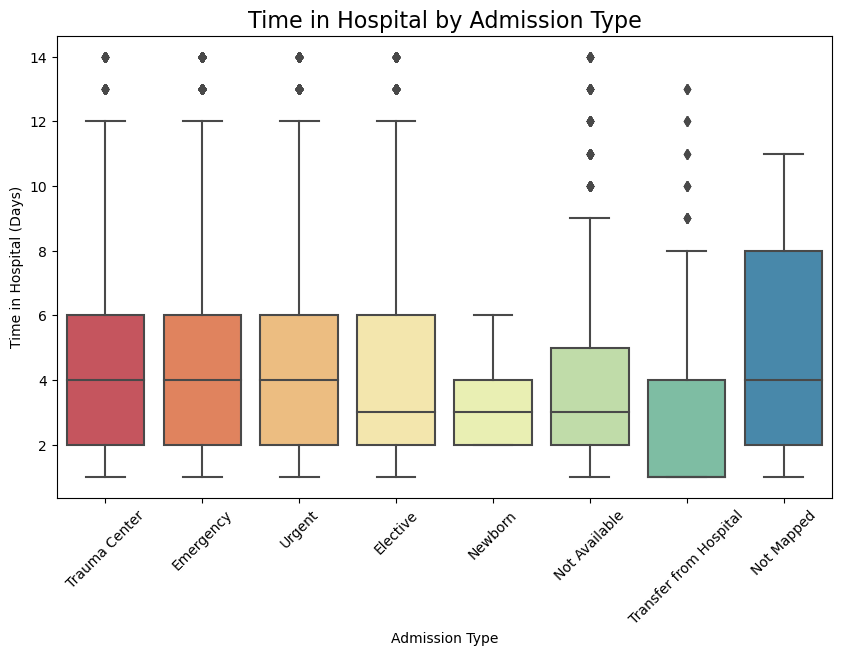

In [34]:
plt.figure(figsize=(10, 6))

# Create a boxplot showing time in hospital by admission type
sns.boxplot(data=diabetic_df1, x='admission_type', y='time_in_hospital', palette='Spectral')

plt.title('Time in Hospital by Admission Type', fontsize=16)
plt.xlabel('Admission Type')
plt.ylabel('Time in Hospital (Days)')
plt.xticks(rotation=45)

plt.show()

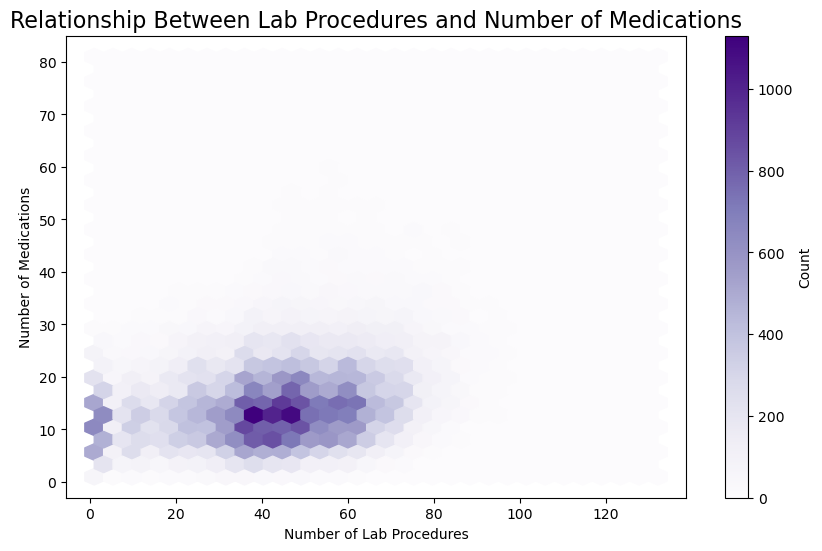

In [35]:
plt.figure(figsize=(10, 6))

# Plot a hexbin plot to show the relationship between the number of lab procedures and number of medications
# The 'gridsize=30' parameter indicates the number of hexagons in the plot
plt.hexbin(diabetic_df1['num_lab_procedures'], diabetic_df1['num_medications'], gridsize=30, cmap='Purples')

# Add a color bar to the plot to show the count
plt.colorbar(label='Count')

plt.title('Relationship Between Lab Procedures and Number of Medications', fontsize=16)
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')

plt.show()

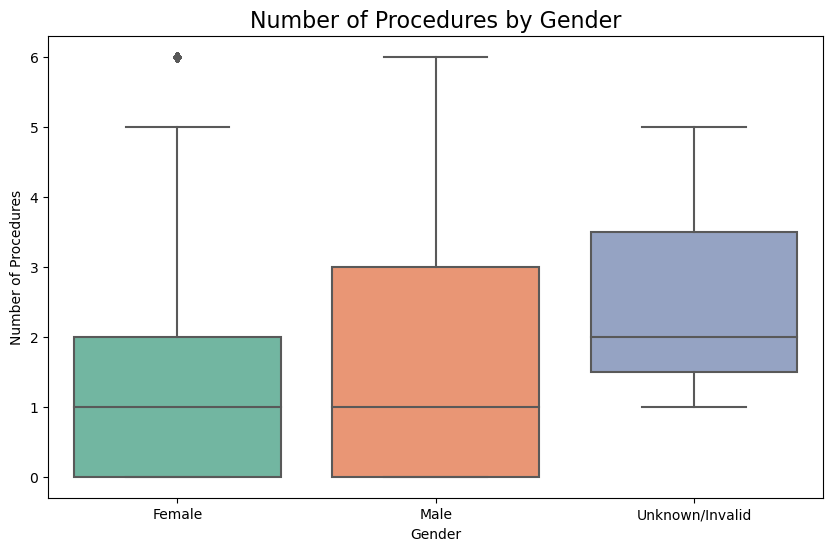

In [36]:
plt.figure(figsize=(10, 6))

# A boxplot to compare the number of procedures between the genders
sns.boxplot(x='gender', y='num_procedures', data=diabetic_df1, palette='Set2')

plt.title('Number of Procedures by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Procedures')

plt.show()

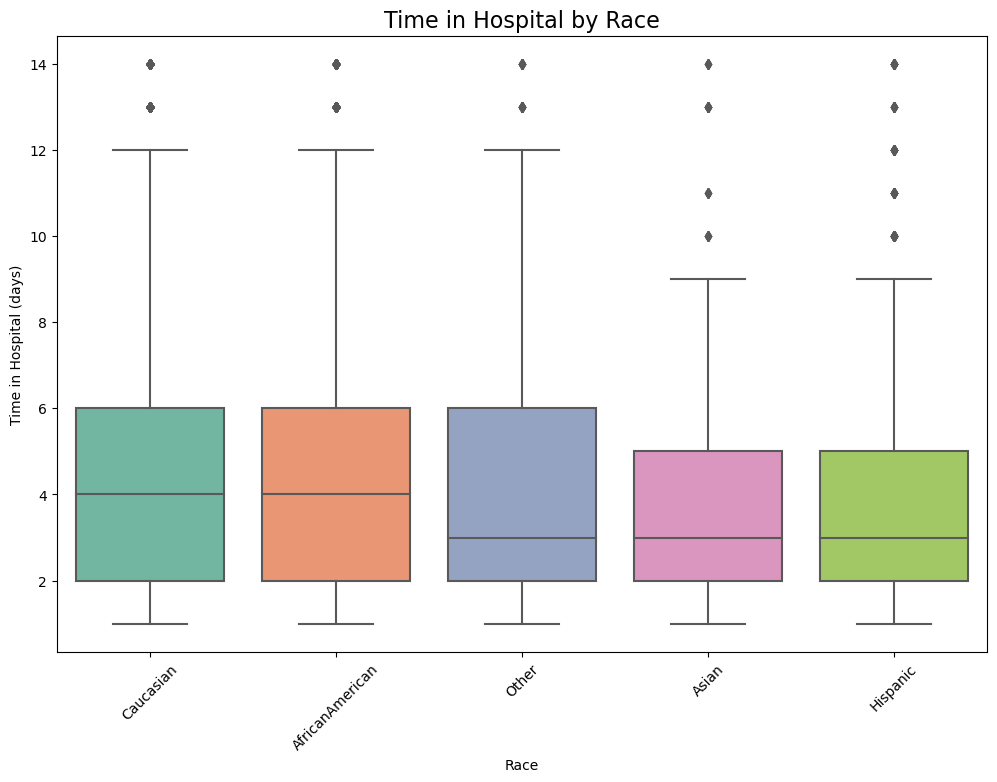

In [37]:
plt.figure(figsize=(12, 8))

# A boxplot to compare the time different races spent in the hospital
sns.boxplot(x='race', y='time_in_hospital', data=diabetic_df1, palette='Set2')

plt.title('Time in Hospital by Race', fontsize=16)
plt.xlabel('Race')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=45)

plt.show()

### Further Analysis

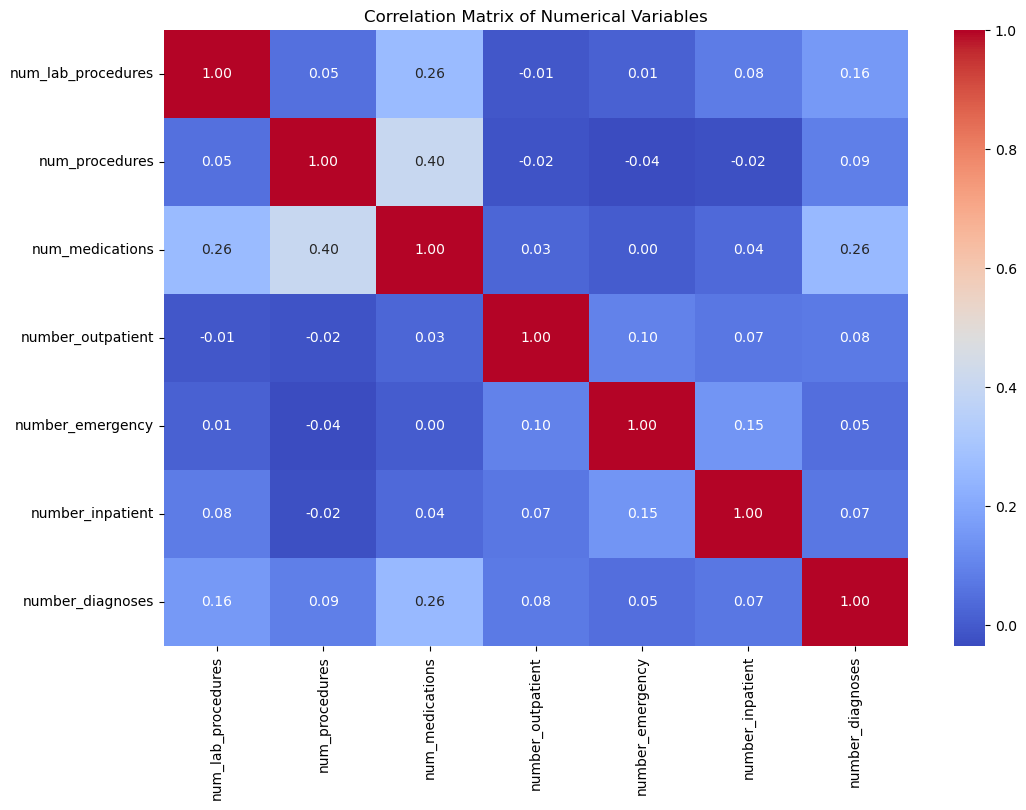

In [38]:
# Define a DataFrame made up of select numerical columns from the original DataFrame
numeric_df = diabetic_df1[[
                           'num_lab_procedures',
                           'num_procedures',
                           'num_medications',
                           'number_outpatient',
                           'number_emergency',
                           'number_inpatient',
                           'number_diagnoses'
                           ]]
# Find the correlation matrix for the chosen numerical variables
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))

# Create a heatmap to show the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')

plt.show()

#### Medication Usage Across Different Races

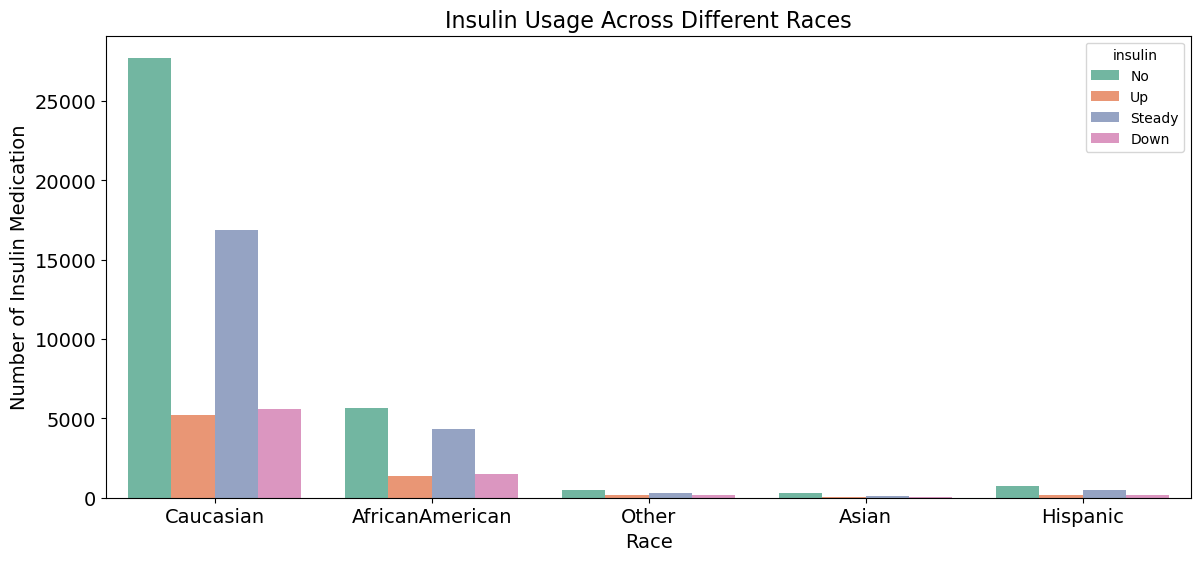

In [39]:
plt.figure(figsize=(14, 6))

# Count plot showing the usage of insulin across different races
sns.countplot(data=diabetic_df1, x='race', hue='insulin', palette='Set2')

plt.title('Insulin Usage Across Different Races', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Number of Insulin Medication', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

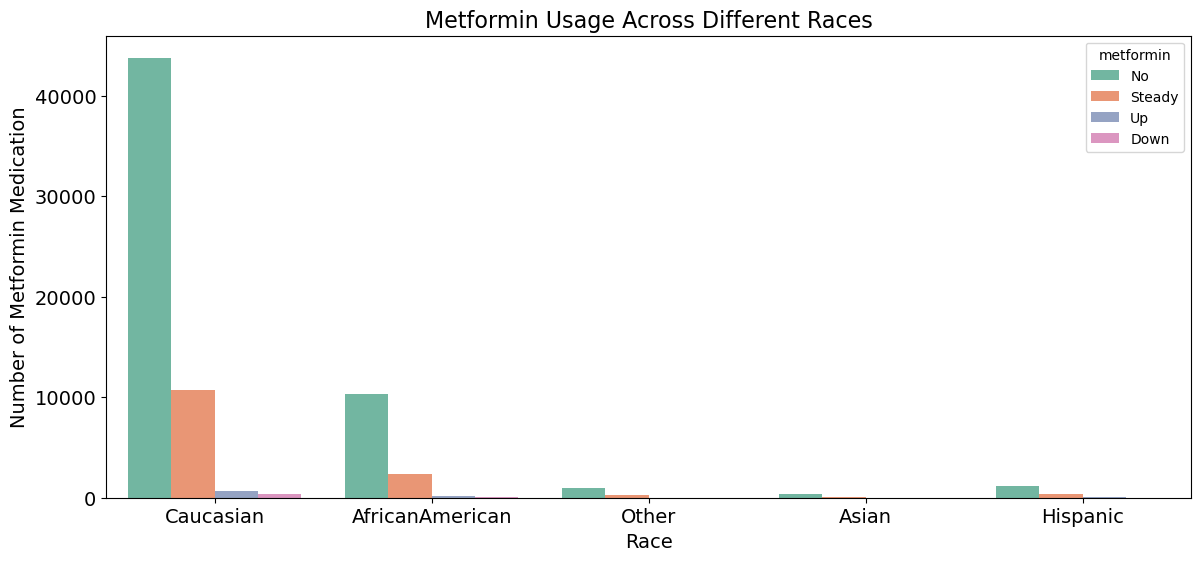

In [40]:
# Usage of Metformin Across Different Races
plt.figure(figsize=(14, 6))

sns.countplot(data=diabetic_df1, x='race', hue='metformin', palette='Set2')
plt.title('Metformin Usage Across Different Races', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Number of Metformin Medication', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### Medication Usage Across Different Genders

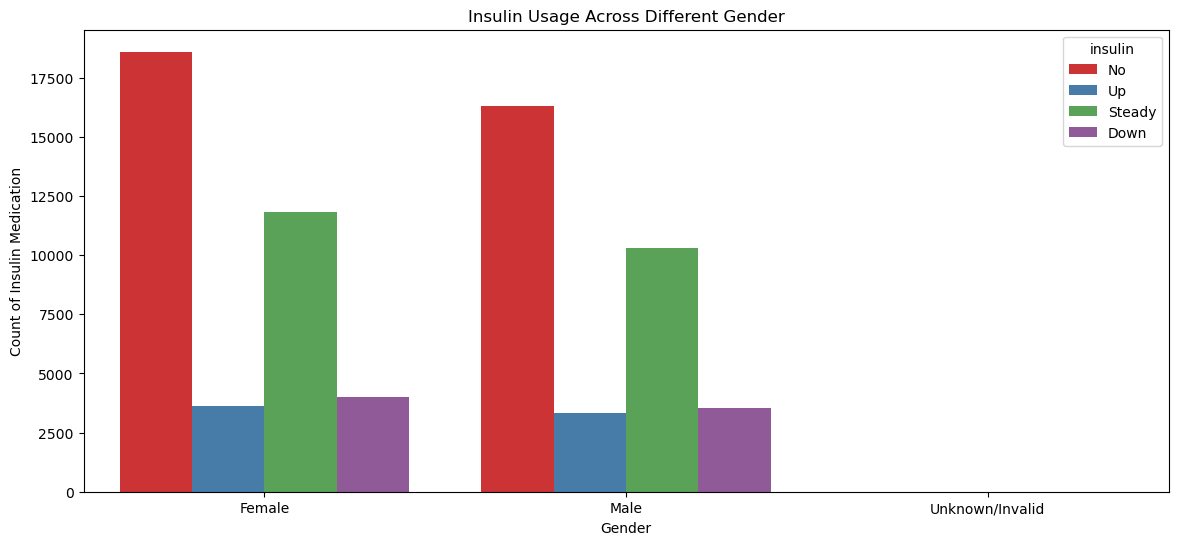

In [41]:
# Usage of Insulin Across Different Genders
plt.figure(figsize=(14, 6))
sns.countplot(data=diabetic_df1, x='gender', hue='insulin', palette='Set1')
plt.title('Insulin Usage Across Different Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Insulin Medication')
plt.show()

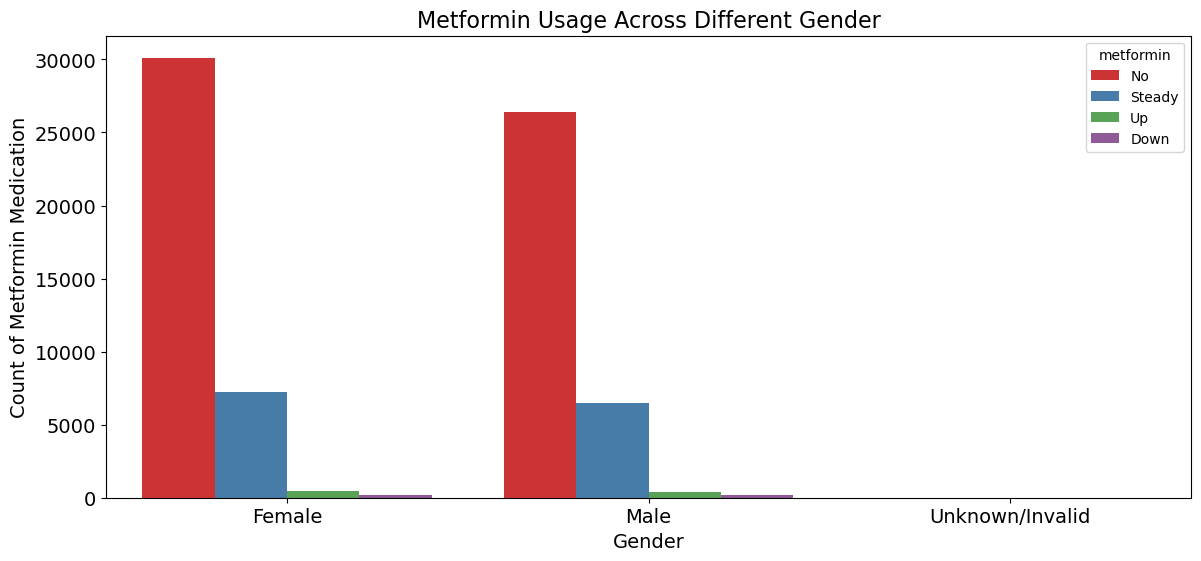

In [42]:
plt.figure(figsize=(14, 6))

# Count plot to see the proportions in which different gender use Metformin
sns.countplot(data=diabetic_df1, x='gender', hue='metformin', palette='Set1')

plt.title('Metformin Usage Across Different Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count of Metformin Medication', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

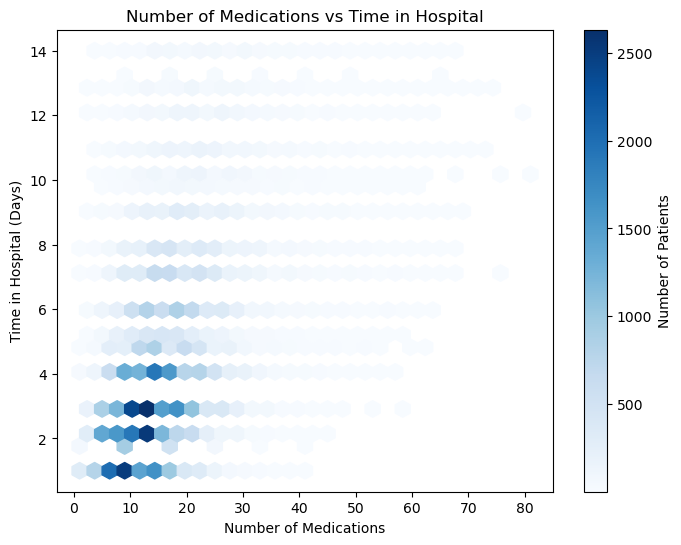

In [43]:
# To check if there's a correlation between number of medications a patient is on and number of days they spend in the hospital
plt.figure(figsize=(8, 6))

# Create a hexbin plot to check this correlation
plt.hexbin(x=diabetic_df1['num_medications'], y=diabetic_df1['time_in_hospital'], gridsize=30, cmap='Blues', mincnt=1)

plt.colorbar(label='Number of Patients')
plt.title('Number of Medications vs Time in Hospital')
plt.xlabel('Number of Medications')
plt.ylabel('Time in Hospital (Days)')

plt.show()

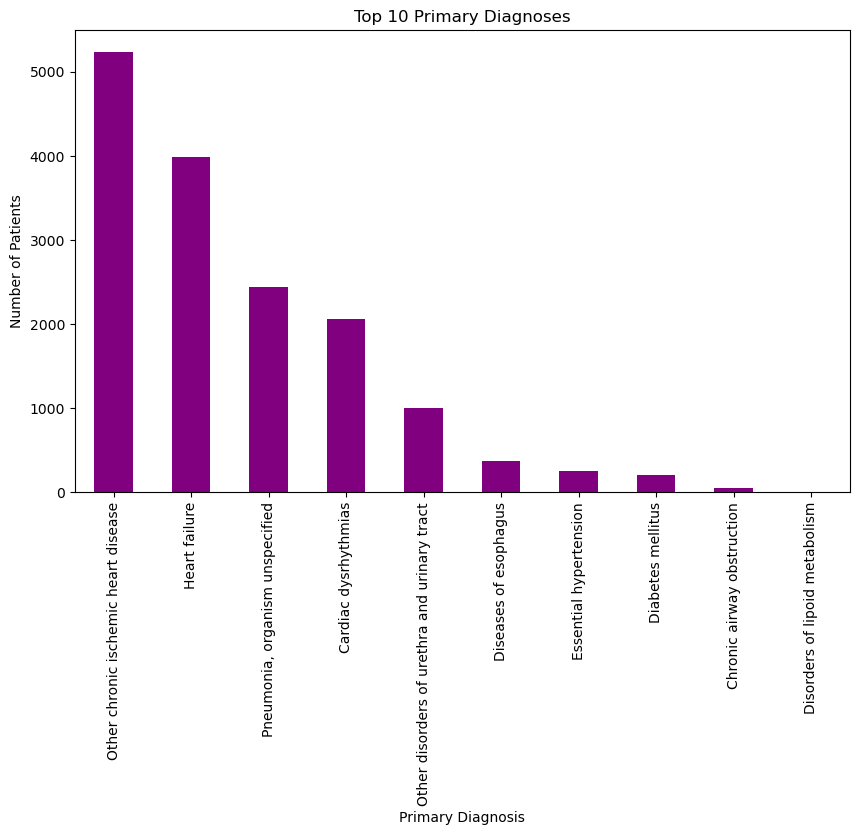

In [44]:
# Create a dictionary to map 'diag_1' values to more meaningful descriptions
diagnosis_mapping = {
    '250': 'Diabetes mellitus',
    '401': 'Essential hypertension',
    '428': 'Heart failure',
    '414': 'Other chronic ischemic heart disease',
    '486': 'Pneumonia, organism unspecified',
    '272': 'Disorders of lipoid metabolism',
    '599': 'Other disorders of urethra and urinary tract',
    '496': 'Chronic airway obstruction',
    '530': 'Diseases of esophagus',
    '427': 'Cardiac dysrhythmias'
}

# Map the 'diag_1' column to the earlier-defined descriptions
diabetic_df1['primary_diagnosis'] = diabetic_df1['diag_1'].map(diagnosis_mapping)

plt.figure(figsize=(10, 6))

# The 'value_counts().head(10)' selects the top 10 primary diagnoses by count
diabetic_df1['primary_diagnosis'].value_counts().head(10).plot(kind='bar', color='purple')

plt.title('Top 10 Primary Diagnoses')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)

plt.show()

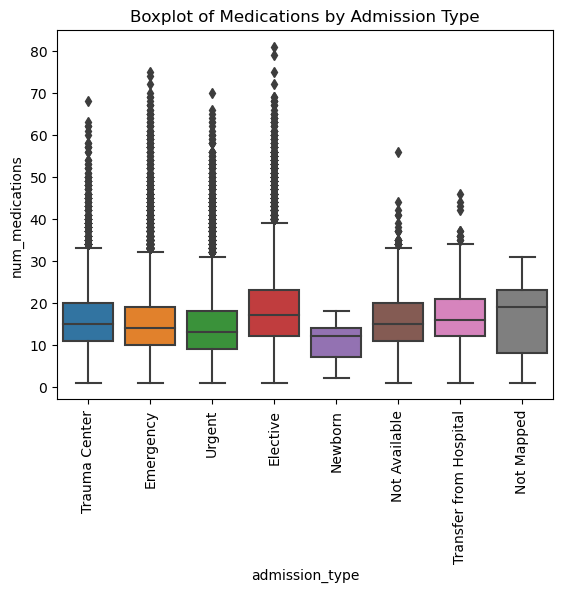

In [45]:
# Boxplot showing number of medications vs admission type
sns.boxplot(x='admission_type', y='num_medications', data=diabetic_df1)

plt.title('Boxplot of Medications by Admission Type')
plt.xticks(rotation=90)

plt.show()

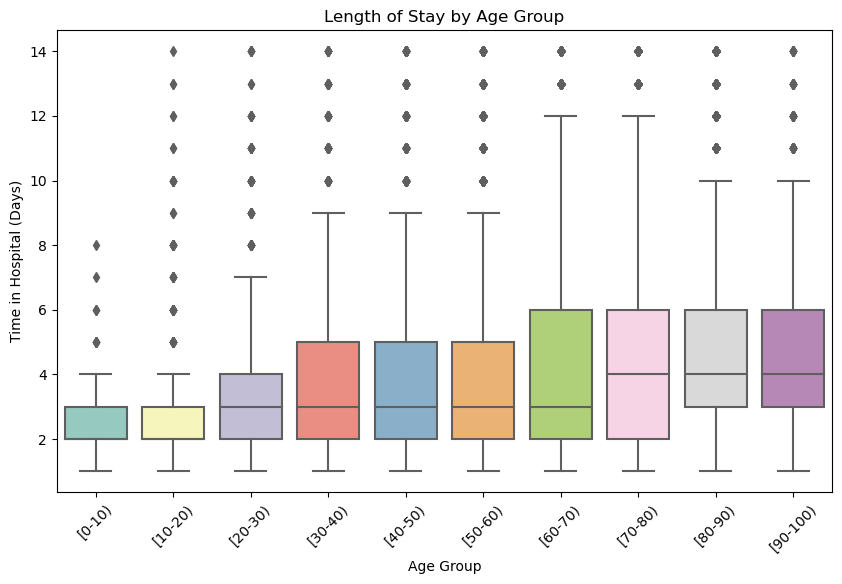

In [46]:
plt.figure(figsize=(10, 6))

# Create a boxplot to show the length of hospital stay by age group
sns.boxplot(data=diabetic_df1, x='age', y='time_in_hospital', palette='Set3')

plt.title('Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time in Hospital (Days)')
plt.xticks(rotation=45)

plt.show()

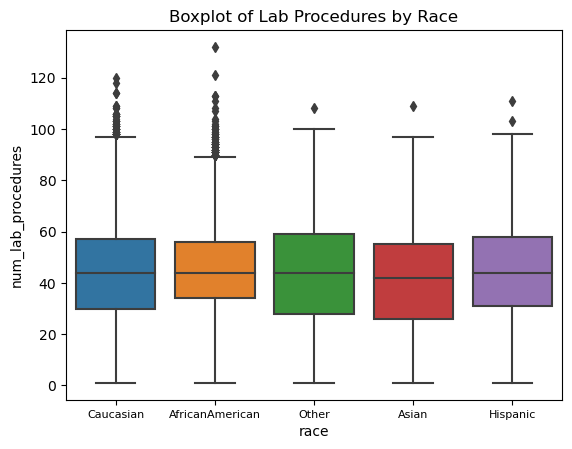

In [47]:
# Boxplot showing number of lab procedures vs race
sns.boxplot(x='race', y='num_lab_procedures', data=diabetic_df1)
plt.title('Boxplot of Lab Procedures by Race')
plt.xticks(fontsize=8)
plt.show()

### Analysis of the Target Variable (readmitted)

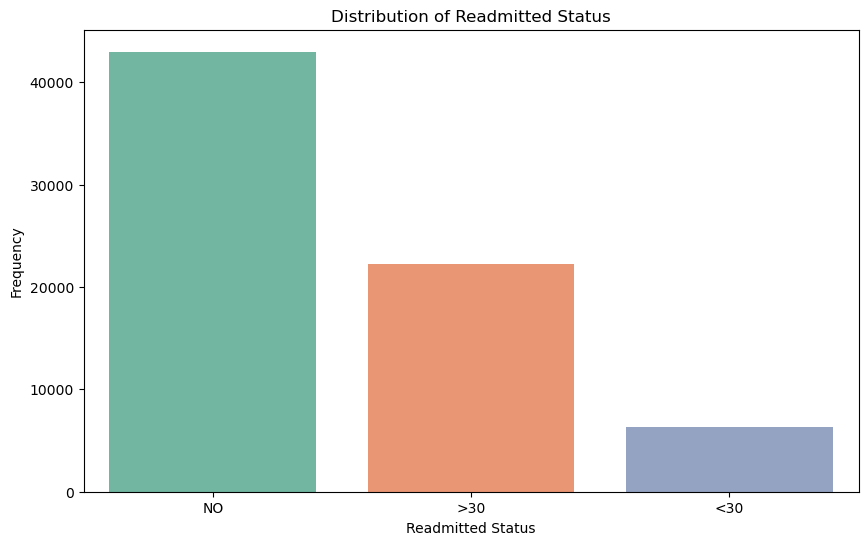

In [48]:
plt.figure(figsize=(10, 6))

# Count plot to visualize how readmitted status is distributed among patients
sns.countplot(x='readmitted', data=diabetic_df1, palette='Set2')

plt.title('Distribution of Readmitted Status')
plt.xlabel('Readmitted Status')
plt.ylabel('Frequency')

plt.show()

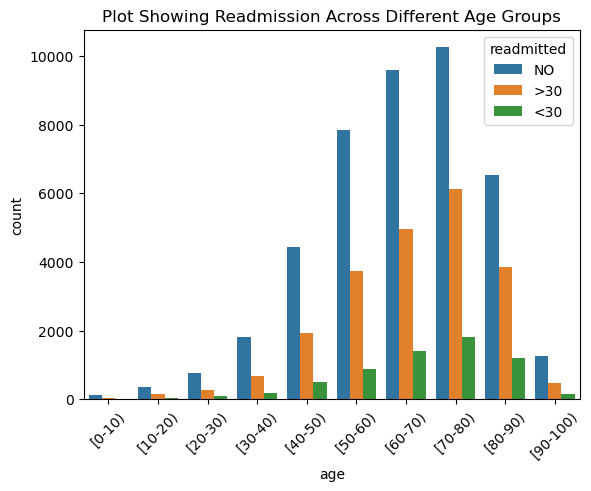

In [49]:
# View how readmission is distributed across age groups
sns.countplot(x='age', hue='readmitted', data=diabetic_df1)
plt.title('Plot Showing Readmission Across Different Age Groups')
plt.xticks(rotation=45)
plt.show()

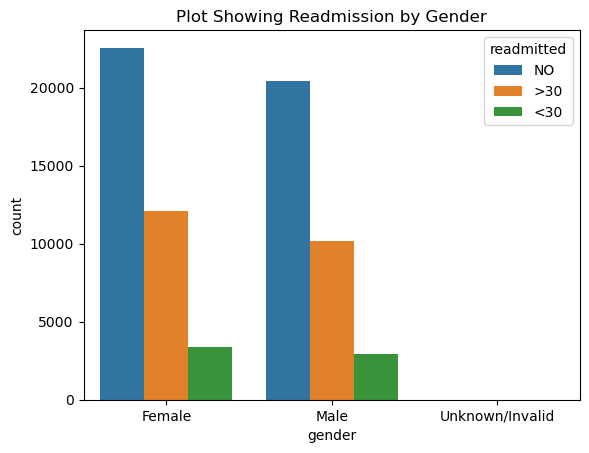

In [50]:
# View how readmission is distributed across gender
sns.countplot(x='gender', hue='readmitted', data=diabetic_df1)
plt.title('Plot Showing Readmission by Gender')
plt.show()

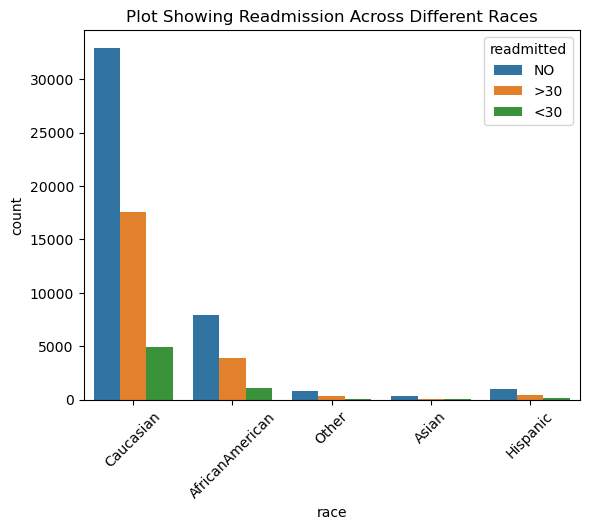

In [51]:
# View how readmission is distributed across race
sns.countplot(x='race', hue='readmitted', data=diabetic_df1)
plt.title('Plot Showing Readmission Across Different Races')
plt.xticks(rotation=45)
plt.show()

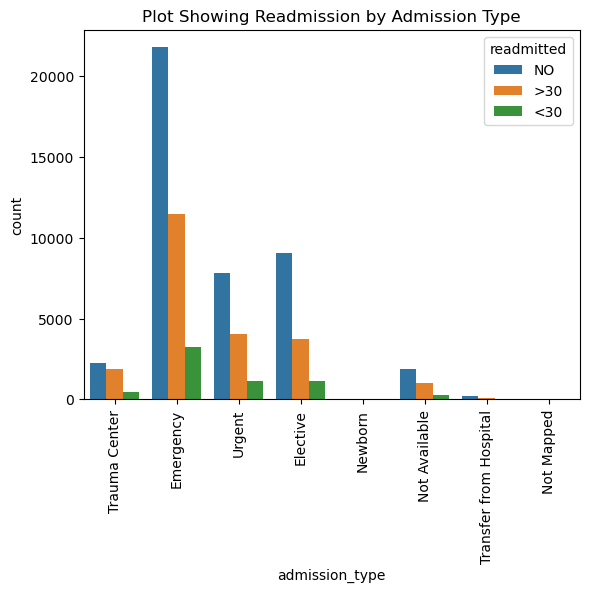

In [52]:
# View how readmission is distributed across admission type
sns.countplot(x='admission_type', hue='readmitted', data=diabetic_df1)
plt.title('Plot Showing Readmission by Admission Type')
plt.xticks(rotation=90)
plt.show()

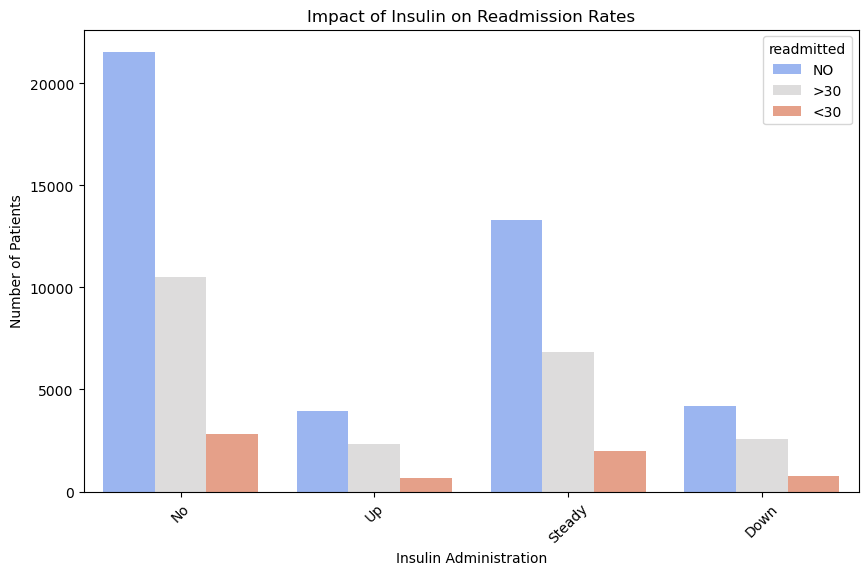

In [53]:
# To check the effect of insulin on readmission rates
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df1, x='insulin', hue='readmitted', palette='coolwarm')
plt.title('Impact of Insulin on Readmission Rates')
plt.xlabel('Insulin Administration')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

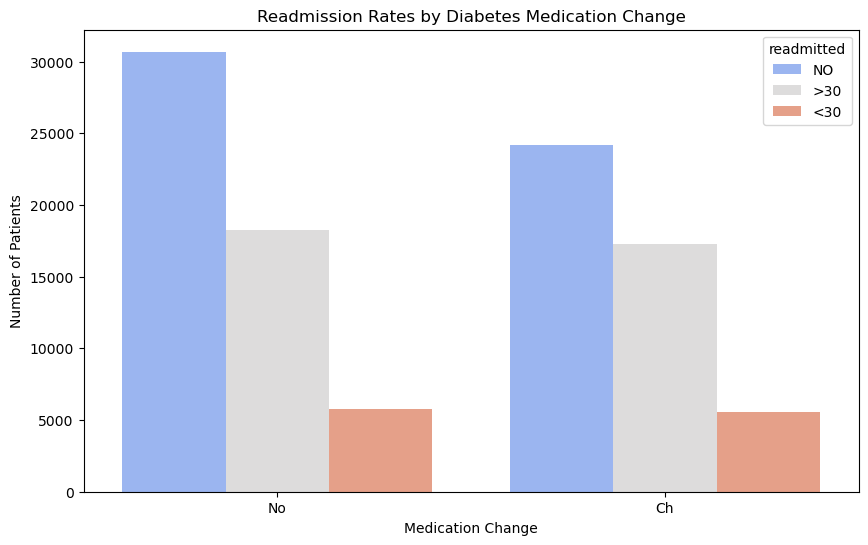

In [54]:
# Evaluate the impact of medication change on readmission rates
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='change', hue='readmitted', palette='coolwarm')
plt.title('Readmission Rates by Diabetes Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('Number of Patients')
plt.show()

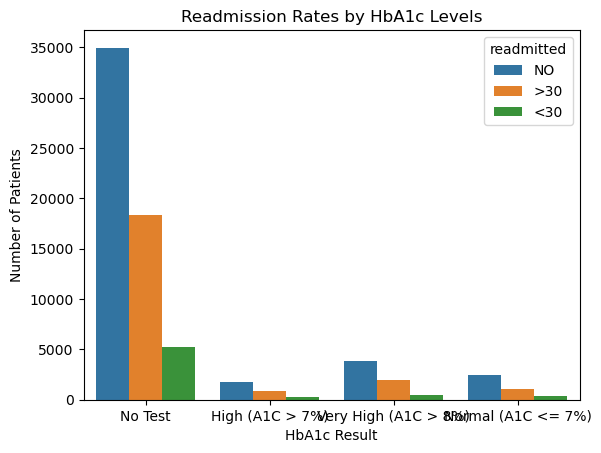

In [55]:
# Analyzing the relationship between HbA1c and readmission
sns.countplot(x='A1Cresult', hue='readmitted', data=diabetic_df1)
plt.title('Readmission Rates by HbA1c Levels')
plt.xlabel('HbA1c Result')
plt.ylabel('Number of Patients')
plt.show()

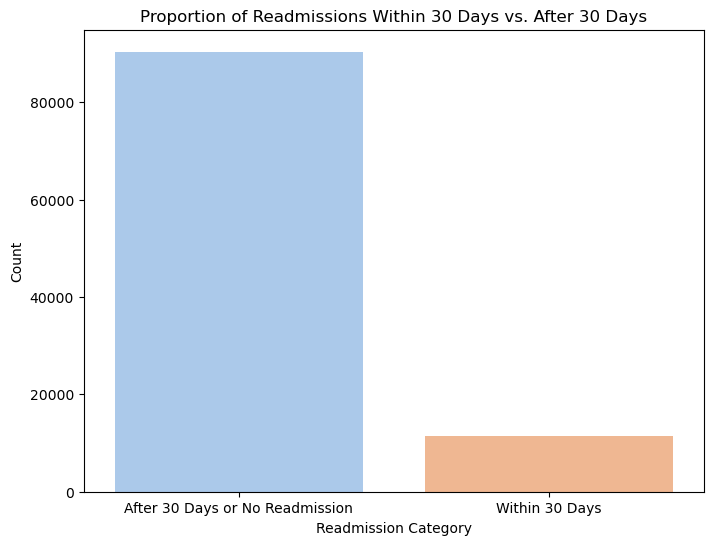

In [56]:
# To compare readmissions within 30 days versus after 30 days or no readmission
plt.figure(figsize=(8, 6))
diabetic_df['readmission_category'] = diabetic_df['readmitted'].apply(lambda x: 'Within 30 Days' if x == '<30' else 'After 30 Days or No Readmission')
sns.countplot(data=diabetic_df, x='readmission_category', palette='pastel')
plt.title('Proportion of Readmissions Within 30 Days vs. After 30 Days')
plt.xlabel('Readmission Category')
plt.ylabel('Count')
plt.show()

## Skewness & Kurtosis

In [57]:
# Define the variables you want to analyze
numeric_variables = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

# Calculate skewness and kurtosis using Pandas
skewness_values = diabetic_df1[numeric_variables].skew()
kurtosis_values = diabetic_df1[numeric_variables].kurt()

# Print out the skewness and kurtosis values of the numerical columns
print(f'Skewness:\n{skewness_values}\n')
print(f'Kurtosis:\n{kurtosis_values}')

Skewness:
time_in_hospital       1.171409
num_lab_procedures    -0.215155
num_medications        1.425563
number_outpatient      9.679206
number_emergency      21.149176
number_inpatient       5.545911
dtype: float64

Kurtosis:
time_in_hospital         0.974443
num_lab_procedures      -0.289947
num_medications          3.800584
number_outpatient      182.495400
number_emergency      1208.533556
number_inpatient        46.668036
dtype: float64


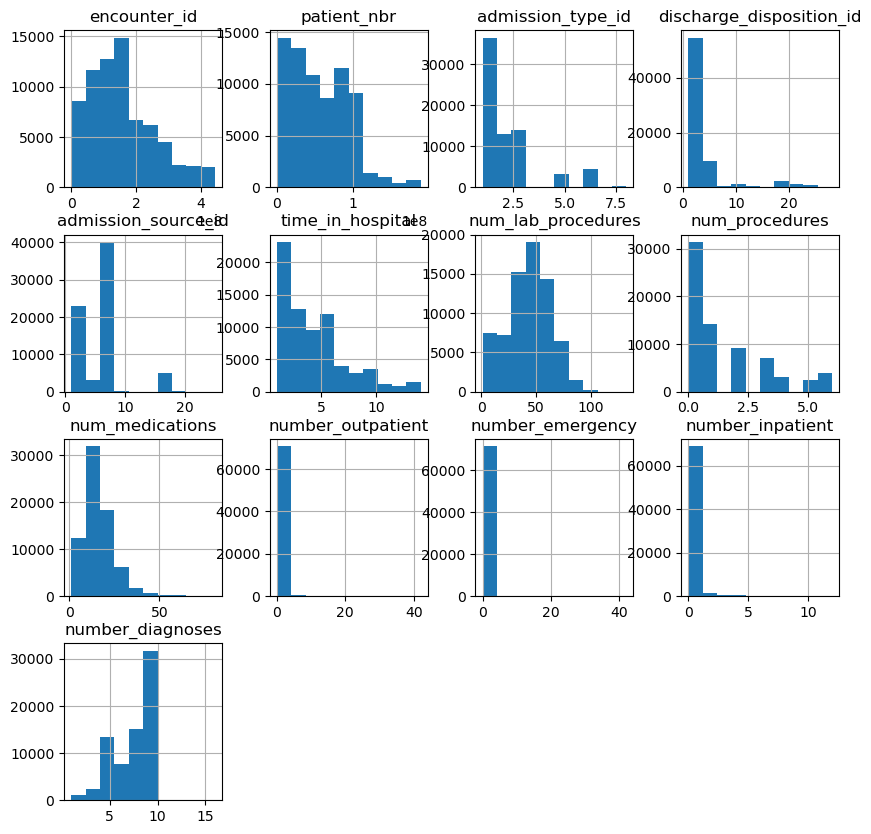

In [58]:
# Checking for skewness via plotting graph to see if its positvely skewed or negatively skewed
diabetic_df1.hist(figsize=(10,10))
plt.show()

## Data Preprocessing

### Standardization
Scale the numerical features so that they have similar ranges or distributions.

In [59]:
# Make a list of the numerical variables to be standardised
numerical_variables = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]

# Initialize the StandardScaler that will be used to standardize the numerical variables
ss = StandardScaler()

# Use the StandardScaler on the numerical variables, replacing the original values with the standardized ones
diabetic_df1[numerical_variables] = ss.fit_transform(diabetic_df1[numerical_variables])

# View the first five rows of the standardized numerical variables
diabetic_df1[numerical_variables].head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,-1.115266,-0.104022,-0.812896,-1.769323,-0.262004,-0.203346,-0.294524,-3.131210
1,-0.437113,0.798134,-0.812896,0.276134,-0.262004,-0.203346,-0.294524,0.879498
2,-0.776190,-1.607616,2.028252,-0.325471,1.608992,-0.203346,1.361694,-0.624518
3,-0.776190,0.046337,-0.244667,0.035492,-0.262004,-0.203346,-0.294524,-0.123179
4,-1.115266,0.397175,-0.812896,-0.927076,-0.262004,-0.203346,-0.294524,-1.125856


### Medication Feature Selection
Select the most relevant features related to medication

In [60]:
# Make a list of all medications used for diabetes treatment in the dataset
medication_df = diabetic_df1[['metformin', 'repaglinide',
                    'nateglinide', 'chlorpropamide', 'glimepiride',
                    'acetohexamide', 'glipizide', 'glyburide',
                    'tolbutamide', 'pioglitazone', 'rosiglitazone',
                    'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']]

# Count the occurences of 'No' for each medication and sum them up
# 'No' means that the medication was not administered
number_of_med = medication_df.apply(lambda x: (x == 'No').sum())

# Sort the medications in increasing order of 'No' responses
# This allows us to see the medications that are most frequently administered
number_of_med_sorted = number_of_med.sort_values(ascending=True)

# Pick the top 2 medications that are most frequently administered
top_2_med = number_of_med_sorted.head(2)

# Print out these top 2 medications
# These are the medications that most likely has the biggest impact on admission rates, hence, we'll use them for modeling
print(f'Top 2 medications administered:\n{top_2_med}')

Top 2 medications administered:
insulin      34921
metformin    56527
dtype: int64


### One-Hot Encoding
Convert categorical variables into numerical format for modeling.

In [61]:
# Make a list of the categorical variables for one-hot encoding
categorical_variables = [
    'age', 'gender', 'race', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id',
    'medical_specialty', 'A1Cresult', 'diag_1', 'diag_2',
    'diag_3', 'max_glu_serum', 'glipizide',
    'change', 'diabetesMed', 'insulin', 'metformin'
]

# Make a list of the numerical variables to be used in the final dataset
numerical_variables = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Addition of both categorical and numerical variables to use in the final dataset
# The target variable 'readmitted' is also included
columns_to_keep = categorical_variables + numerical_variables + ['readmitted']

# Create a DataFrame of columns in the 'columns_to_keep' list
columns_to_keep_df = diabetic_df1[columns_to_keep]

# Apply one-hot encoding to the categorical variables in the DataFrame
# The 'drop_first=True' is to avoid multicollinearity
diabetic_encoded_df = pd.get_dummies(columns_to_keep_df, columns=categorical_variables, drop_first=True)

# Convert the 'readmitted' column into binary where '<30' becomes 1 and anything else is 0
diabetic_encoded_df['readmitted'] = diabetic_df1['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# View the first few rows of the one-hot encoded DataFrame
print(diabetic_encoded_df.head())

# Display the number of rows and columns of the DataFrame
diabetic_encoded_df.shape

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.115266           -0.104022       -0.812896        -1.769323   
1         -0.437113            0.798134       -0.812896         0.276134   
2         -0.776190           -1.607616        2.028252        -0.325471   
3         -0.776190            0.046337       -0.244667         0.035492   
4         -1.115266            0.397175       -0.812896        -0.927076   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0          -0.262004         -0.203346         -0.294524         -3.131210   
1          -0.262004         -0.203346         -0.294524          0.879498   
2           1.608992         -0.203346          1.361694         -0.624518   
3          -0.262004         -0.203346         -0.294524         -0.123179   
4          -0.262004         -0.203346         -0.294524         -1.125856   

   readmitted  age_[10-20)  ...  glipizide_Steady  glipizide_Up  change_No

(71518, 2338)

### Feature Selection (SelectFromModel with RandomForestClassifier)

Select the most relevant features for modeling

In [62]:
# Create a RandomForest Classifier with 100 trees and a fixed random state
rfc = RandomForestClassifier(n_estimators=100, random_state=20)

# Fit the model on the dataset using all features except 'readmitted' - the target variable
rfc.fit(diabetic_encoded_df.drop('readmitted', axis=1), diabetic_encoded_df['readmitted'])

# Use SelectFromModel to select the most relevant features
sfm = SelectFromModel(rfc, threshold='mean', prefit=True)

# Get the names of the selected features deemed relevant by the model
features_selected = diabetic_encoded_df.drop('readmitted', axis=1).columns[sfm.get_support()]

# Create a new DataFrame containing the selected features only
diabetic_selected_df = diabetic_encoded_df[features_selected].copy()

# Add the target variable ('readmitted') back to the DataFrame
diabetic_selected_df['readmitted'] = diabetic_encoded_df['readmitted']

# Save the new DataFrame with the selected features in a CSV file for modeling
diabetic_selected_df.to_csv('preprocessed_data.csv', index=False)

# Print message when the save is complete
print("File Saved Successfully!")

File Saved Successfully!


In [63]:
# Check the number of rows and columns of the DataFrame containing the selected features
diabetic_selected_df.shape

(71518, 352)